<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [82]:
from pydataset import data
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [83]:
# Read CSV
house_csv = pd.read_csv('Sacramento_transactions.csv')

In [84]:
house_csv.shape

(985, 12)

In [85]:
house_csv.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [86]:
house_csv.nunique()

street       981
city          39
zip           68
state          1
beds           8
baths          6
sq__ft       603
type           4
sale_date      5
price        605
latitude     969
longitude    967
dtype: int64

In [87]:
house_csv.type.value_counts()

Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: type, dtype: int64

In [88]:
house_csv.value_counts('beds')

beds
3    413
4    258
2    133
0    108
5     59
1     10
6      3
8      1
dtype: int64

In [89]:
house_csv.value_counts('baths')

baths
2    544
1    180
3    132
0    108
4     19
5      2
dtype: int64

In [90]:
house_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [91]:
# check to find sq__ft = 0.0
sum(house_csv['sq__ft']==0)

171

In [92]:
# find the median of sq__ft
import math
median_sq__ft = math.floor(house_csv.sq__ft.median())
median_sq__ft

1304

In [93]:
# replace sq__ft = 0 with median value
house_csv['sq__ft'] = house_csv['sq__ft'].replace(0, median_sq__ft)

In [94]:
# check to find price = 0.0
sum(house_csv['sq__ft']==0)

0

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [95]:
# ANSWER
house_csv['price']

0       59222
1       68212
2       68880
3       69307
4       81900
        ...  
980    232425
981    234000
982    235000
983    235301
984    235738
Name: price, Length: 985, dtype: int64

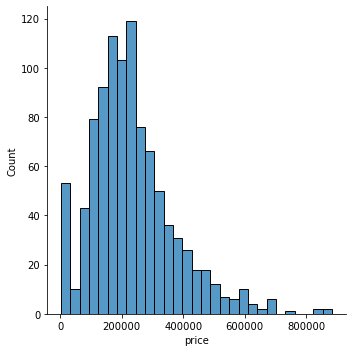

In [96]:
sns.displot(house_csv['price']);

In [97]:
house_csv.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1541.296447,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,613.143254,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,484.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,1193.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


#### 2.2 List all possible variables which might be Predictor variable.

In [98]:
# ANSWER
# 1. zip code (location)
# 2. No. of beds(bedrooms)
# 3. No. of baths (bathrooms)
# 4. Sq_ft of the house (size of the house)

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [99]:
# ANSWER
house_csv.corr()
# Based on the findings below, the best predictor is: sq__ft

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,-0.041934,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.504037,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.564538,0.416208,-0.235792,0.016582
sq__ft,-0.041934,0.504037,0.564538,1.000000,0.524249,-0.161997,0.041585
price,-0.093353,0.342024,0.416208,0.524249,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.161997,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,0.041585,0.284485,0.387925,1.000000


In [100]:
# specifically we want to confirm if there is a strong correlation between sqft of the house and the price. If house sqft increases, so does the price of the house.
print(house_csv['sq__ft'].corr(house_csv['price']))

0.524249302985615


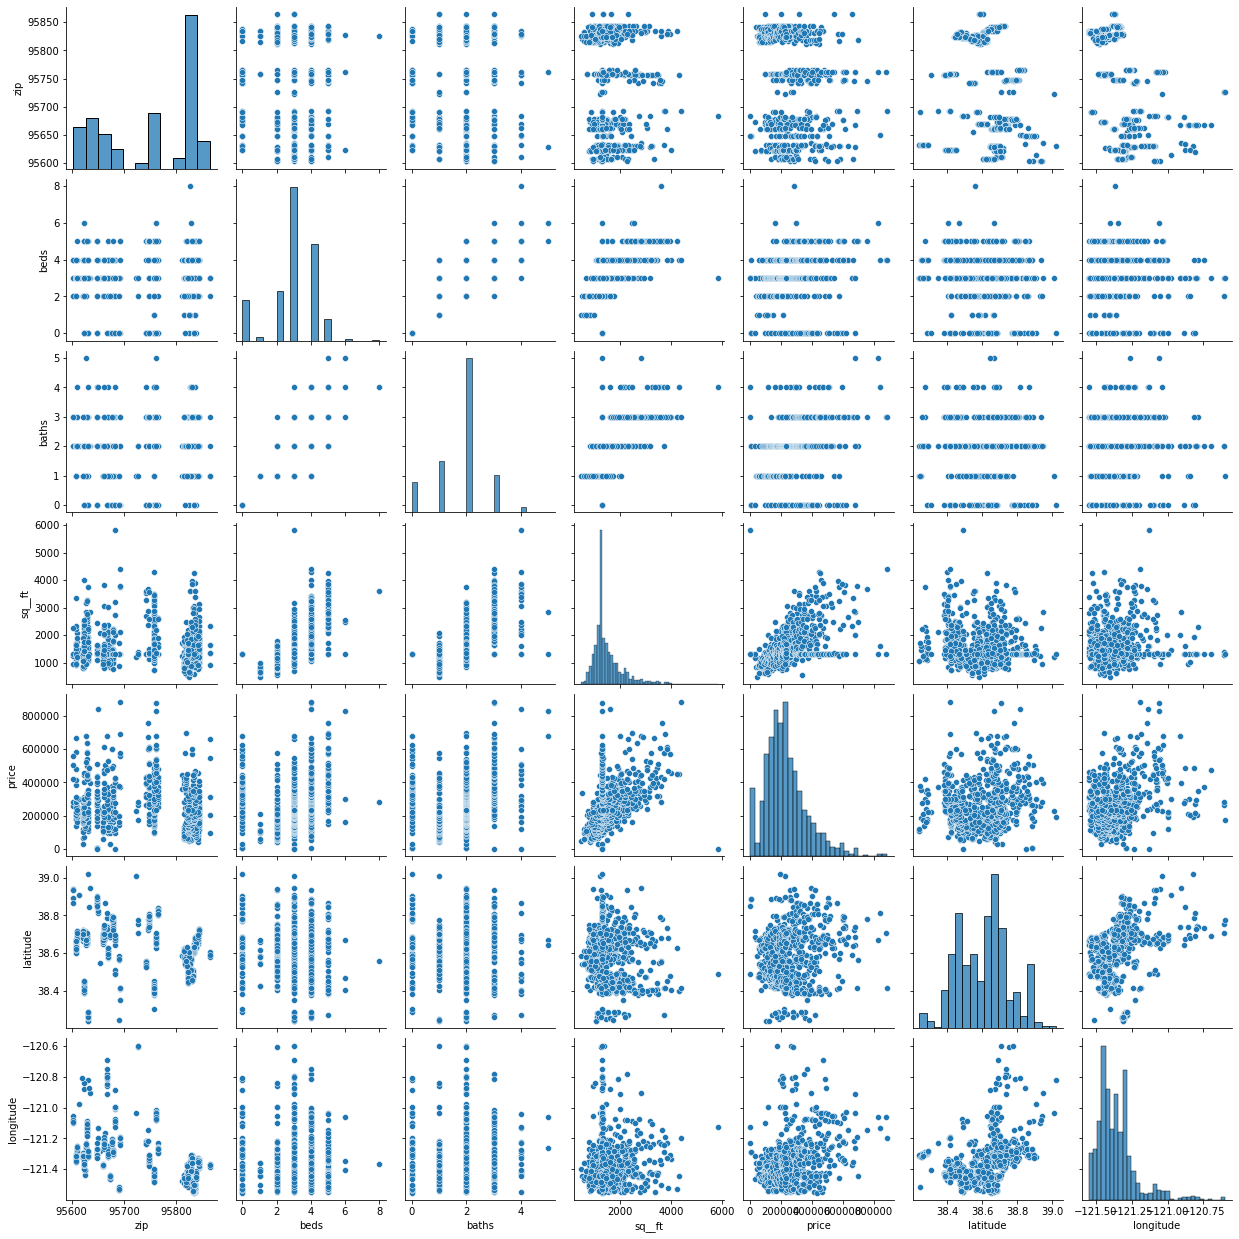

In [101]:
sns.pairplot(house_csv);

In [102]:
# check if no. of bedrooms have a direct influence on price
beds_price = house_csv.groupby('beds')['price'].mean()
print(beds_price)

beds
0    187585.046296
1    109646.200000
2    165428.300752
3    215612.915254
4    283260.093023
5    399541.542373
6    429966.666667
8    282400.000000
Name: price, dtype: float64


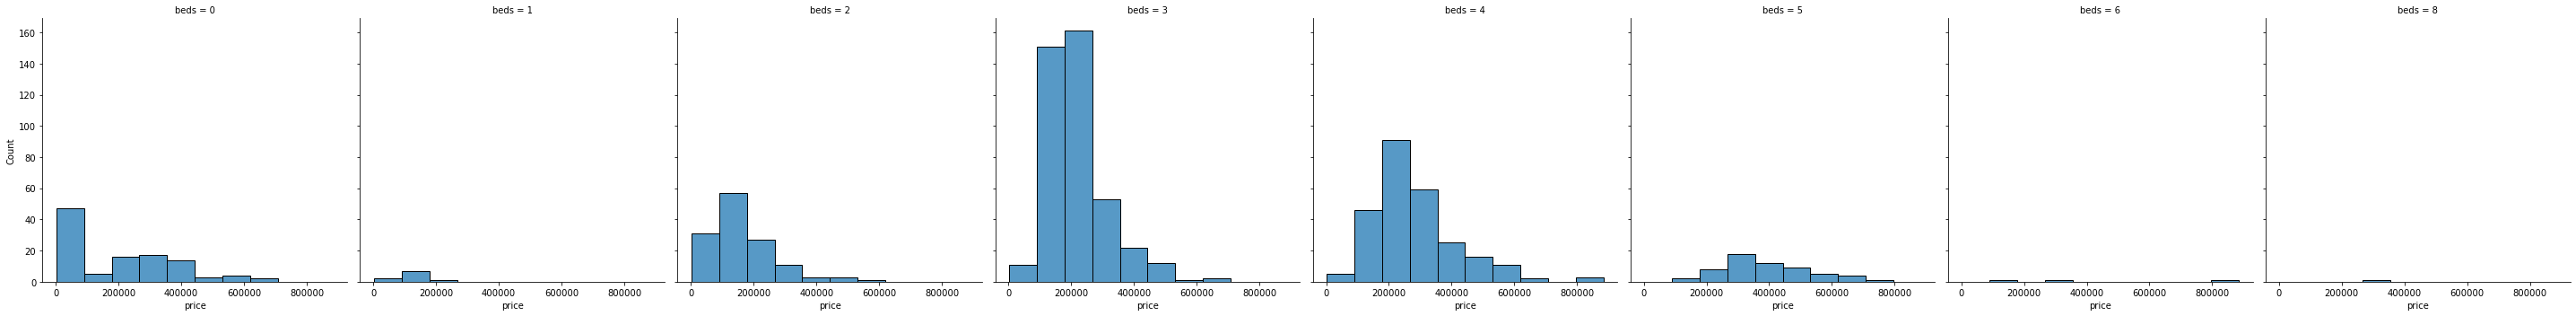

In [104]:
sns.displot(data=house_csv,
            x='price',
            col='beds',
            bins=10)

# Show the plot
plt.show()

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

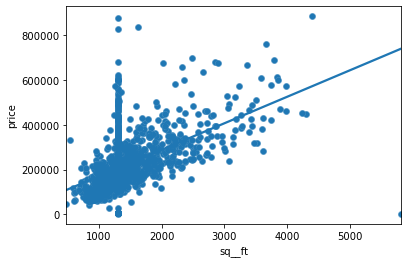

In [105]:
# visualise the correlation of sqft and price with a scatterplot. This is the simplest way to predict price.
sns.scatterplot(x='sq__ft', y='price', data=house_csv);
# Add a trend line to the scatterplot

sns.regplot(x='sq__ft', y='price', data=house_csv, ci=None, scatter_kws={'alpha': 0.5});
plt.show()

In [128]:
m,b=np.polyfit(x=house_csv['sq__ft'], y=house_csv['price'], deg=1)
m,b

(118.30545999296255, 51800.47884696876)

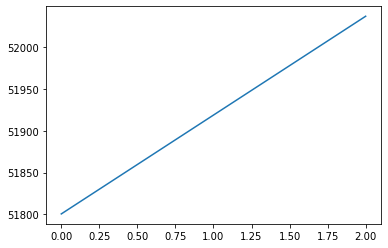

In [129]:
# y = 118 * x + 51800
# 

x_vals = [0,2]
y_vals = [b,(m*2 + b)]
plt.plot(x_vals,y_vals);

In [168]:
import sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True, normalize=False, copy_X=True)
X = house_csv[['sq__ft']]
y = house_csv['price']
lr.fit(X,y)

LinearRegression()

In [171]:
lr.coef_, lr.intercept_

(array([118.30545999]), 51800.478846968734)

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [172]:
def predict_price(sq__ft):
    price = m * sq__ft + b
    return price

In [173]:
predicted_prices = house_csv['sq__ft'].apply(predict_price)

In [174]:
current_price = house_csv['price']

In [175]:
predicted_prices

,0,1,2,3,4,5,6,7,8,9,...,975,976,977,978,979,980,981,982,983,984
0,-5.378274e+05,-261111.350595,-5.712674e+05,-5.244514e+05,-5.704314e+05,-298731.350595,-313779.350595,-252751.350595,-4.500474e+05,-278667.350595,...,-24523.350595,-101435.350595,-125679.350595,197016.649405,-181691.350595,6.693566e+05,-1951.350595,-220147.350595,171936.649405,-98091.350595
1,-7.712805e+05,-385003.474453,-8.179605e+05,-7.526085e+05,-8.167935e+05,-437518.474453,-458524.474453,-373333.474453,-6.487455e+05,-409510.474453,...,-54742.474453,-162106.474453,-195949.474453,254512.525547,-274138.474453,9.138675e+05,-23233.474453,-327820.474453,219502.525547,-157438.474453
2,-5.096155e+05,-246139.492727,-5.414555e+05,-4.968795e+05,-5.406595e+05,-281959.492727,-296287.492727,-238179.492727,-4.260355e+05,-262855.492727,...,-20871.492727,-94103.492727,-117187.492727,190068.507273,-170519.492727,6.398085e+05,620.507273,-207135.492727,166188.507273,-90919.492727
3,-5.491121e+05,-267100.093742,-5.831921e+05,-5.354801e+05,-5.823401e+05,-305440.093742,-320776.093742,-258580.093742,-4.596521e+05,-284992.093742,...,-25984.093742,-104368.093742,-129076.093742,199795.906258,-186160.093742,6.811759e+05,-2980.093742,-225352.093742,174235.906258,-100960.093742
4,-5.103208e+05,-246513.789173,-5.422008e+05,-4.975688e+05,-5.414038e+05,-282378.789173,-296724.789173,-238543.789173,-4.266358e+05,-263250.789173,...,-20962.789173,-94286.789173,-117399.789173,190242.210827,-170798.789173,6.405472e+05,556.210827,-207460.789173,166332.210827,-91098.789173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,-1.556275e+06,-801595.419630,-1.647475e+06,-1.519795e+06,-1.645195e+06,-904195.419630,-945235.419630,-778795.419630,-1.316875e+06,-849475.419630,...,-156355.419630,-366115.419630,-432235.419630,447844.580370,-584995.419630,1.736045e+06,-94795.419630,-689875.419630,379444.580370,-356995.419630
981,-9.899224e+05,-501035.372930,-1.049002e+06,-9.662904e+05,-1.047525e+06,-567500.372930,-594086.372930,-486265.372930,-8.348374e+05,-532052.372930,...,-83044.372930,-218928.372930,-261761.372930,308360.627070,-360720.372930,1.142866e+06,-43165.372930,-428662.372930,264050.627070,-213020.372930
982,-8.058400e+05,-403344.000341,-8.544800e+05,-7.863840e+05,-8.532640e+05,-458064.000341,-479952.000341,-391184.000341,-6.781600e+05,-428880.000341,...,-59216.000341,-171088.000341,-206352.000341,263023.999659,-287824.000341,9.500640e+05,-26384.000341,-343760.000341,226543.999659,-166224.000341
983,-1.136624e+06,-578889.033843,-1.204024e+06,-1.109664e+06,-1.202339e+06,-654714.033843,-685044.033843,-562039.033843,-9.596990e+05,-614274.033843,...,-102034.033843,-257054.033843,-305919.033843,344490.966157,-418814.033843,1.296516e+06,-56539.033843,-496324.033843,293940.966157,-250314.033843


In [176]:
m,b

(0     -705.296447
 1     -374.296447
 2     -745.296447
 3     -689.296447
 4     -744.296447
           ...    
 980    738.703553
 981    -64.296447
 982   -325.296447
 983    143.703553
 984   -179.296447
 Name: sq__ft, Length: 985, dtype: float64,
 51800.47884696876)

In [177]:
residual = current_price - predicted_prices
residual

,0,1,2,3,4,5,6,7,8,9,...,975,976,977,978,979,980,981,982,983,984
0,5.970494e+05,329323.350595,6.401474e+05,5.937584e+05,6.523314e+05,388652.350595,4.046744e+05,343753.350595,5.449524e+05,377604.350595,...,252523.350595,330462.350595,355179.350595,32983.350595,411691.350595,-4.369316e+05,235951.350595,455147.350595,63364.350595,333829.350595
1,8.305025e+05,453215.474453,8.868405e+05,8.219155e+05,8.986935e+05,527439.474453,5.494195e+05,464335.474453,7.436505e+05,508447.474453,...,282742.474453,391133.474453,425449.474453,-24512.525547,504138.474453,-6.814425e+05,257233.474453,562820.474453,15798.474453,393176.474453
2,5.688375e+05,314351.492727,6.103355e+05,5.661865e+05,6.225595e+05,371880.492727,3.871825e+05,329181.492727,5.209405e+05,361792.492727,...,248871.492727,323130.492727,346687.492727,39931.492727,400519.492727,-4.073835e+05,233379.492727,442135.492727,69112.492727,326657.492727
3,6.083341e+05,335312.093742,6.520721e+05,6.047871e+05,6.642401e+05,395361.093742,4.116711e+05,349582.093742,5.545571e+05,383929.093742,...,253984.093742,333395.093742,358576.093742,30204.093742,416160.093742,-4.487509e+05,236980.093742,460352.093742,61065.093742,336698.093742
4,5.695428e+05,314725.789173,6.110808e+05,5.668758e+05,6.233038e+05,372299.789173,3.876198e+05,329545.789173,5.215408e+05,362187.789173,...,248962.789173,323313.789173,346899.789173,39757.789173,400798.789173,-4.081222e+05,233443.789173,442460.789173,68968.789173,326836.789173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,1.615497e+06,869807.419630,1.716355e+06,1.589102e+06,1.727095e+06,994116.419630,1.036130e+06,869797.419630,1.411780e+06,948412.419630,...,384355.419630,595142.419630,661735.419630,-217844.580370,814995.419630,-1.503620e+06,328795.419630,924875.419630,-144143.580370,592733.419630
981,1.049144e+06,569247.372930,1.117882e+06,1.035597e+06,1.129425e+06,657421.372930,6.849814e+05,577267.372930,9.297424e+05,630989.372930,...,311044.372930,447955.372930,491261.372930,-78360.627070,590720.372930,-9.104406e+05,277165.372930,663662.372930,-28749.627070,448758.372930
982,8.650620e+05,471556.000341,9.233600e+05,8.556910e+05,9.351640e+05,547985.000341,5.708470e+05,482186.000341,7.730650e+05,527817.000341,...,287216.000341,400115.000341,435852.000341,-33023.999659,517824.000341,-7.176390e+05,260384.000341,578760.000341,8757.000341,401962.000341
983,1.195846e+06,647101.033843,1.272904e+06,1.178971e+06,1.284239e+06,744635.033843,7.759390e+05,653041.033843,1.054604e+06,713211.033843,...,330034.033843,486081.033843,535419.033843,-114490.966157,648814.033843,-1.064091e+06,290539.033843,731324.033843,-58639.966157,486052.033843


In [178]:
np.abs(residual)

,0,1,2,3,4,5,6,7,8,9,...,975,976,977,978,979,980,981,982,983,984
0,5.970494e+05,329323.350595,6.401474e+05,5.937584e+05,6.523314e+05,388652.350595,4.046744e+05,343753.350595,5.449524e+05,377604.350595,...,252523.350595,330462.350595,355179.350595,32983.350595,411691.350595,4.369316e+05,235951.350595,455147.350595,63364.350595,333829.350595
1,8.305025e+05,453215.474453,8.868405e+05,8.219155e+05,8.986935e+05,527439.474453,5.494195e+05,464335.474453,7.436505e+05,508447.474453,...,282742.474453,391133.474453,425449.474453,24512.525547,504138.474453,6.814425e+05,257233.474453,562820.474453,15798.474453,393176.474453
2,5.688375e+05,314351.492727,6.103355e+05,5.661865e+05,6.225595e+05,371880.492727,3.871825e+05,329181.492727,5.209405e+05,361792.492727,...,248871.492727,323130.492727,346687.492727,39931.492727,400519.492727,4.073835e+05,233379.492727,442135.492727,69112.492727,326657.492727
3,6.083341e+05,335312.093742,6.520721e+05,6.047871e+05,6.642401e+05,395361.093742,4.116711e+05,349582.093742,5.545571e+05,383929.093742,...,253984.093742,333395.093742,358576.093742,30204.093742,416160.093742,4.487509e+05,236980.093742,460352.093742,61065.093742,336698.093742
4,5.695428e+05,314725.789173,6.110808e+05,5.668758e+05,6.233038e+05,372299.789173,3.876198e+05,329545.789173,5.215408e+05,362187.789173,...,248962.789173,323313.789173,346899.789173,39757.789173,400798.789173,4.081222e+05,233443.789173,442460.789173,68968.789173,326836.789173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,1.615497e+06,869807.419630,1.716355e+06,1.589102e+06,1.727095e+06,994116.419630,1.036130e+06,869797.419630,1.411780e+06,948412.419630,...,384355.419630,595142.419630,661735.419630,217844.580370,814995.419630,1.503620e+06,328795.419630,924875.419630,144143.580370,592733.419630
981,1.049144e+06,569247.372930,1.117882e+06,1.035597e+06,1.129425e+06,657421.372930,6.849814e+05,577267.372930,9.297424e+05,630989.372930,...,311044.372930,447955.372930,491261.372930,78360.627070,590720.372930,9.104406e+05,277165.372930,663662.372930,28749.627070,448758.372930
982,8.650620e+05,471556.000341,9.233600e+05,8.556910e+05,9.351640e+05,547985.000341,5.708470e+05,482186.000341,7.730650e+05,527817.000341,...,287216.000341,400115.000341,435852.000341,33023.999659,517824.000341,7.176390e+05,260384.000341,578760.000341,8757.000341,401962.000341
983,1.195846e+06,647101.033843,1.272904e+06,1.178971e+06,1.284239e+06,744635.033843,7.759390e+05,653041.033843,1.054604e+06,713211.033843,...,330034.033843,486081.033843,535419.033843,114490.966157,648814.033843,1.064091e+06,290539.033843,731324.033843,58639.966157,486052.033843


#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [179]:
# ANSWER
X = np.array(house_csv['sq__ft']).reshape(-1,1)
y = house_csv['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [180]:
# ANSWER
k = (house_csv['price'] - house_csv['price'].mean())
m = (house_csv['sq__ft'] - house_csv['sq__ft'].mean())
n = ((house_csv['sq__ft'] - house_csv['sq__ft'].mean())**2).sum()
beta_1 = ((k*m)/n).sum().round(decimals=2)
beta_1

118.31

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [181]:
# ANSWER
beta_0 = ((house_csv['price'].mean()) - (beta_1*house_csv['sq__ft'].mean())).round(decimals=2)
beta_0

51793.48

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [182]:
# ANSWER
y_hat = beta_0 + (beta_1*(house_csv['sq__ft']))
y_hat

0      150700.64
1      189861.25
2      145968.24
3      152593.60
4      146086.55
         ...    
980    321540.28
981    226537.35
982    195658.44
983    251145.83
984    212931.70
Name: sq__ft, Length: 985, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [183]:
# ANSWER
residual_1 = current_price - y_hat
residual_1

0      -91478.64
1     -121649.25
2      -77088.24
3      -83286.60
4      -64186.55
         ...    
980    -89115.28
981      7462.65
982     39341.56
983    -15844.83
984     22806.30
Length: 985, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [184]:
# ANSWER
SStot = ((house_csv['price']-house_csv['price'].mean())**2).sum()
SStot

18838783738865.37

In [185]:
SSres = ((house_csv['price']-y_hat)**2).sum()
SSres

13661182691586.89

In [186]:
R2 = 1-(SSres/SStot)
R2

0.27483733127616017

##### 2.7.F [BONUS] Draw Plot of Predicted Line

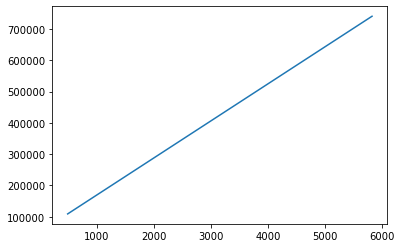

In [187]:
# ANSWER
m = lr.coef_
b = lr.intercept_
func = lambda x : m*x + b
min_sqft = house_csv['sq__ft'].min()
max_sqft = house_csv['sq__ft'].max()
X1 = np.array([484, 5822])
y1 = np.array([func(484), func(5822)])
plt.plot(X1,y1);

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

In [ ]:
# ANSWER

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [189]:
# ANSWER
beta_1 
beta_0
predicted_price = beta_1*1204 + beta_0
predicted_price


194238.72



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



